<a href="https://colab.research.google.com/github/hartonosng/mygithub/blob/master/tf_RDN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Pakai GPU
import tensorflow as tf
tf.test.gpu_device_name()

#Listing device
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

#Checking RAM
!cat /proc/meminfo


MemTotal:       13302924 kB
MemFree:         6026748 kB
MemAvailable:   11954716 kB
Buffers:          151556 kB
Cached:          5728212 kB
SwapCached:            0 kB
Active:          2538124 kB
Inactive:        4308196 kB
Active(anon):     758092 kB
Inactive(anon):    10608 kB
Active(file):    1780032 kB
Inactive(file):  4297588 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               912 kB
Writeback:             0 kB
AnonPages:        966532 kB
Mapped:           661192 kB
Shmem:             11372 kB
KReclaimable:     176296 kB
Slab:             235840 kB
SReclaimable:     176296 kB
SUnreclaim:        59544 kB
KernelStack:        5948 kB
PageTables:         9812 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    4233108 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       52208 kB
VmallocChunk:          0 kB
Percpu:          

In [2]:
import numpy as np
import cv2
import glob
import tensorflow as tf
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Add, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import glob

# Importing drive method from colab for accessing google drive
from google.colab import drive

In [5]:
# Mounting drive
# This will require authentication : Follow the steps as guided
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Viewing the data in the folder present from the drive
!ls "/content/drive/My Drive/data_gambar"

baboon_0deg.jpg		 comic_314.4deg.jpg    man_207.9deg.jpg
baboon_101.4deg.jpg	 comic_319.4deg.jpg    man_213.0deg.jpg
baboon_10.1deg.jpg	 comic_324.5deg.jpg    man_218.0deg.jpg
baboon_106.5deg.jpg	 comic_329.6deg.jpg    man_223.1deg.jpg
baboon_111.5deg.jpg	 comic_334.6deg.jpg    man_228.2deg.jpg
baboon_116.6deg.jpg	 comic_339.7deg.jpg    man_233.2deg.jpg
baboon_121.7deg.jpg	 comic_344.8deg.jpg    man_238.3deg.jpg
baboon_126.8deg.jpg	 comic_349.9deg.jpg    man_243.4deg.jpg
baboon_131.8deg.jpg	 comic_354.9deg.jpg    man_248.5deg.jpg
baboon_136.9deg.jpg	 comic_35.5deg.jpg     man_253.5deg.jpg
baboon_142.0deg.jpg	 comic_40.6deg.jpg     man_25.4deg.jpg
baboon_147.0deg.jpg	 comic_45.6deg.jpg     man_258.6deg.jpg
baboon_152.1deg.jpg	 comic_50.7deg.jpg     man_263.7deg.jpg
baboon_15.2deg.jpg	 comic_5.1deg.jpg      man_268.7deg.jpg
baboon_157.2deg.jpg	 comic_55.8deg.jpg     man_273.8deg.jpg
baboon_162.3deg.jpg	 comic_60.8deg.jpg     man_278.9deg.jpg
baboon_167.3deg.jpg	 comic_65.9deg.jpg     man

In [7]:
face_images = glob.glob('/content/drive/My Drive/data_gambar/*.jpg') #gives path

print(face_images[:10], len(face_images))

['/content/drive/My Drive/data_gambar/baboon_45.6deg.jpg', '/content/drive/My Drive/data_gambar/baboon_55.8deg.jpg', '/content/drive/My Drive/data_gambar/baboon_40.6deg.jpg', '/content/drive/My Drive/data_gambar/baboon_35.5deg.jpg', '/content/drive/My Drive/data_gambar/baboon_10.1deg.jpg', '/content/drive/My Drive/data_gambar/baboon_76.1deg.jpg', '/content/drive/My Drive/data_gambar/baboon_25.4deg.jpg', '/content/drive/My Drive/data_gambar/baboon_15.2deg.jpg', '/content/drive/My Drive/data_gambar/baboon_91.3deg.jpg', '/content/drive/My Drive/data_gambar/baboon_86.2deg.jpg'] 994


In [8]:
with open('face_images_path.pickle','wb') as f: 
  pickle.dump(face_images,f)

In [9]:
from tqdm import tqdm         #A progess library
from multiprocessing import Pool
progress = tqdm(total= len(face_images), position=0)  

print(progress)
def read(path):
  img = image.load_img(path, target_size=(80,80,3))
  img = image.img_to_array(img)
  img = img/255.
  progress.update(1)
  return img

#p = Pool(1)
p = Pool(10) #awalnya ini
img_array = p.map(read, face_images)

  0%|          | 0/994 [00:00<?, ?it/s]

  0%|          | 0/994 [00:00<?, ?it/s]


 10%|█         | 100/994 [00:04<00:26, 33.63it/s]

In [10]:
ls

drive/  face_images_path.pickle  img_array.pickle  rdb-tes.h5  sample_data/


In [11]:
with open('img_array.pickle','wb') as f:
  pickle.dump(img_array, f)

In [12]:
len(img_array)

994

In [13]:
with open('img_array.pickle','rb') as f:
  img_array = pickle.load(f)

In [14]:
ls

drive/  face_images_path.pickle  img_array.pickle  rdb-tes.h5  sample_data/


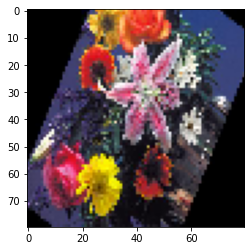

In [15]:
plt.imshow(img_array[444])

In [16]:
all_images = np.array(img_array)

In [17]:
#print(all_images)
all_images.shape

(994, 80, 80, 3)

In [18]:
#Split test and train data. all_images will be our output images
train_x, val_x = train_test_split(all_images, random_state = 32, test_size=0.2)

In [19]:
#now we will make input images by lowering resolution without changing the size
def pixalate_image(image, scale_percent = 40):
  width = int(image.shape[1] * scale_percent / 100)
  height = int(image.shape[0] * scale_percent / 100)
  dim = (width, height)

  small_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  
  # scale back to original size
  width = int(small_image.shape[1] * 100 / scale_percent)
  height = int(small_image.shape[0] * 100 / scale_percent)
  dim = (width, height)

  low_res_image = cv2.resize(small_image, dim, interpolation = cv2.INTER_AREA)

  return low_res_image

In [20]:
train_x_px = []

for i in range(train_x.shape[0]):
  temp = pixalate_image(train_x[i,:,:,:])
  train_x_px.append(temp)

train_x_px = np.array(train_x_px)


In [21]:
# get low resolution images for the validation set
val_x_px = []

for i in range(val_x.shape[0]):
  temp = pixalate_image(val_x[i,:,:,:])
  # temp = cv2.resize(temp, (160, 160))
  val_x_px.append(temp)

val_x_px = np.array(val_x_px)

In [22]:
train_x_px.shape

(795, 80, 80, 3)

In [23]:
val_x_px.shape

(199, 80, 80, 3)

In [24]:
ls

drive/  face_images_path.pickle  img_array.pickle  rdb-tes.h5  sample_data/


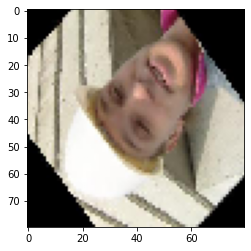

In [25]:
plt.imshow(train_x[20])

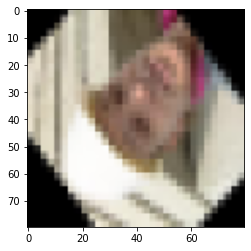

In [26]:
plt.imshow(train_x_px[20])

In [27]:
# RDB original

Input_img = Input(shape=(80, 80, 3))  

x1 = Conv2D(3, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(Input_img)
x2 = Conv2D(3, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x1)

#x3 layer RDB1
x3a = Conv2D(3, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x2)
x3b = Add()([x2, x3a])
x3c = Conv2D(3, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x3b)
x3d = Add()([x2, x3b, x3c])
x3e = Conv2D(3, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x3d)
x3f = Add()([x2, x3b, x3d, x3e]) #concate
x3g_conv1x1 = Conv2D(3, (1, 1), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x3f)
x3_out = Add()([x2, x3g_conv1x1])

#x4 layer RDB2
x4a = Conv2D(3, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x3_out)
x4b = Add()([x3_out, x4a])
x4c = Conv2D(3, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x4b)
x4d = Add()([x3_out, x4b, x4c])
x4e = Conv2D(3, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x4d)
x4f = Add()([x3_out, x4b, x4d, x4e]) #concate
x4g_conv1x1 = Conv2D(3, (1, 1), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x4f)
x4_out = Add()([x3_out, x4g_conv1x1])

#x5 layer RDB3
x5a = Conv2D(3, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x4_out)
x5b = Add()([x4_out, x5a])
x5c = Conv2D(3, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x5b)
x5d = Add()([x4_out, x4b, x4c])
x5e = Conv2D(3, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x5d)
x5f = Add()([x4_out, x5b, x5d, x5e]) #concate
x5g_conv1x1 = Conv2D(3, (1, 1), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x5f)
x5_out = Add()([x4_out, x5g_conv1x1])

#x6 layer concate all
x6 = Add()([x3_out, x4_out, x5_out])
x7_conv1x1 = Conv2D(3, (1, 1), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x6)
x8 = Conv2D(3, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x7_conv1x1)
x9_GRL = Add()([x1, x8])

x10 = UpSampling2D(size=1)(x9_GRL)
x11 = Conv2D(3, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x10)


rdb_model = Model(Input_img, x11)
rdb_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
rdb_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 80, 80, 3)    84          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 80, 80, 3)    84          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 80, 80, 3)    84          conv2d_1[0][0]                   
______________________________________________________________________________________________

In [28]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=1, mode='min')
model_checkpoint = ModelCheckpoint('rdb-tes.h5',save_best_only=True)


In [29]:
train_x.shape

(795, 80, 80, 3)

In [30]:
train_x_px.shape

(795, 80, 80, 3)

Epoch 1/20
398/398 [==============================] - 7s 8ms/step - loss: 0.1025 - accuracy: 0.6716 - val_loss: 0.0865 - val_accuracy: 0.7497
Epoch 2/20
 16/398 [>.............................] - ETA: 2s - loss: 0.0847 - accuracy: 0.6998

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


398/398 [==============================] - 3s 7ms/step - loss: 0.0901 - accuracy: 0.7191 - val_loss: 0.0836 - val_accuracy: 0.7190
Epoch 3/20
398/398 [==============================] - 3s 7ms/step - loss: 0.0880 - accuracy: 0.7042 - val_loss: 0.0823 - val_accuracy: 0.6898
Epoch 4/20
398/398 [==============================] - 3s 7ms/step - loss: 0.0869 - accuracy: 0.7021 - val_loss: 0.0817 - val_accuracy: 0.7099
Epoch 5/20
398/398 [==============================] - 3s 7ms/step - loss: 0.0865 - accuracy: 0.7039 - val_loss: 0.0814 - val_accuracy: 0.7413
Epoch 6/20
398/398 [==============================] - 3s 7ms/step - loss: 0.0862 - accuracy: 0.7029 - val_loss: 0.0811 - val_accuracy: 0.7094
Epoch 7/20
398/398 [==============================] - 3s 7ms/step - loss: 0.0349 - accuracy: 0.5773 - val_loss: 0.0152 - val_accuracy: 0.6293
Epoch 8/20
398/398 [==============================] - 3s 7ms/step - loss: 0.0140 - accuracy: 0.6910 - val_loss: 0.0123 - val_accuracy: 0.7310
Epoch 9/20
398/39

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


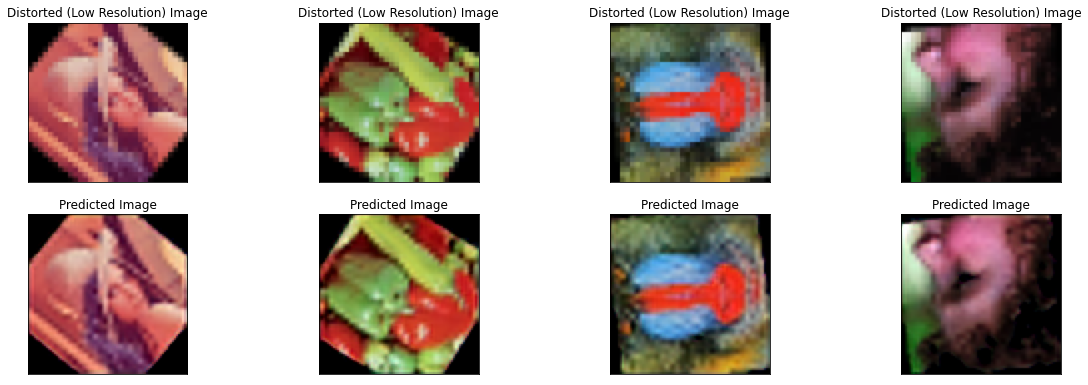

In [31]:
abcd = rdb_model.fit(train_x_px,train_x, epochs=20,batch_size=2,
                     validation_data=(val_x_px, val_x), callbacks=[early_stopper, model_checkpoint])
# rdb_model = tf.keras.models.load_model('rdb-tes.h5')
predictions = rdb_model.predict(val_x_px)

n = 4
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(3, n, i+1)
  ax.set_title("Distorted (Low Resolution) Image")
  plt.imshow(val_x_px[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i+1+n)
  ax.set_title("Predicted Image")
  plt.imshow(predictions[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [32]:
results = rdb_model.evaluate(val_x_px, val_x)
print('loss, accuracy', results)

7/7 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.8081
loss, accuracy [0.010896638035774231, 0.8081116676330566]


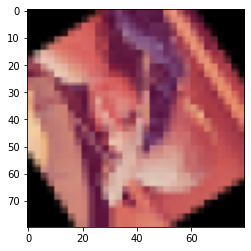

In [33]:
img = image.load_img('/content/drive/My Drive/data_gambar/lenna_213.0deg.jpg', target_size=(80,80,3))
img = image.img_to_array(img)
img = img/255.
img = pixalate_image(img)
plt.imshow(img)
# di save jadi download1.png

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


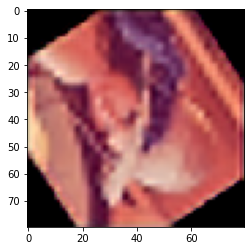

In [34]:
input_array = np.array([img])
#print(input_array)
predict = rdb_model.predict(input_array)
#print(predict)
plt.imshow(predict[0])
# di save jadi download2.png

In [35]:
import math
from sklearn.metrics import mean_squared_error
from math import sqrt

diff = input_array - predict
mse = np.mean((diff) ** 2)
psnr = 20 * math.log10(255.0 / math.sqrt(mse))
rmse = math.sqrt(np.mean(diff ** 2.))
ssim = data_range=img.max() - img.min()
##psnr = 20 * math.log10(255. / rmse)

print('mse=')
print(mse)

print('rmse=')
print(rmse)

print('psnr=')
print(psnr)

print('ssim=')
print(ssim)


#from skimage.measure import compare_ssim as ssim
#from skimage.metrics import structural_similarity as ssim
#s = measure.compare_ssim(download1.png, download2.png, multichannel =True)
##ssim: https://stackoverflow.com/questions/54589296/how-do-i-compare-ssim-between-one-image-and-many-others-using-python
##nilai = ssim(predict, input_array, multichannel =True)

mse=
0.0019904696
rmse=
0.044614679627430015
psnr=
75.14124803432838
ssim=
0.9523138
